CS412: Machine Learning Homework 1
Osman Şah Yılmaz
31316
February 16, 2025

# 1 Overview

This project involves the implementation and evaluation of two popular classification algorithms on the MNIST dataset:  
- k-Nearest Neighbors (k-NN)  
- Decision Tree  

The objectives of this assignment are:  
- To gain hands-on experience in data preprocessing and exploratory analysis on image data.  
- To implement and fine-tune hyperparameters for k-NN and Decision Tree classifiers.  
- To evaluate and compare the performance of both algorithms using appropriate metrics.  
- To document the entire workflow and insights in a clear and reproducible manner using a Jupyter Notebook.

In the following sections, you will find detailed steps covering data loading, preprocessing, model training, hyperparameter optimization, and result analysis.

# 2 Dataset and Preprocessing

The MNIST dataset contains 28×28 grayscale images of handwritten digits (0-9), where each pixel value
ranges from 0 to 255.

### 2.1 Data Loading

In [1]:
from keras.datasets import mnist

# Load MNIST dataset from the Keras API
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [2]:
# Import train_test_split for splitting the dataset
from sklearn.model_selection import train_test_split

# Split the training data (using X_train_full) into 80% for training and 20% for validation
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [3]:
# Print the shapes of the training, validation, and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (48000, 28, 28) (48000,)
Validation set shape: (12000, 28, 28) (12000,)
Test set shape: (10000, 28, 28) (10000,)


### 2.2 Data Analysis

Class Distribution (number of samples per digit) in y_train_full:
Digit 0: 5923
Digit 1: 6742
Digit 2: 5958
Digit 3: 6131
Digit 4: 5842
Digit 5: 5421
Digit 6: 5918
Digit 7: 6265
Digit 8: 5851
Digit 9: 5949

Pixel Value Statistics (X_train_full):
Mean: 33.318421449829934
Standard Deviation: 78.56748998339798


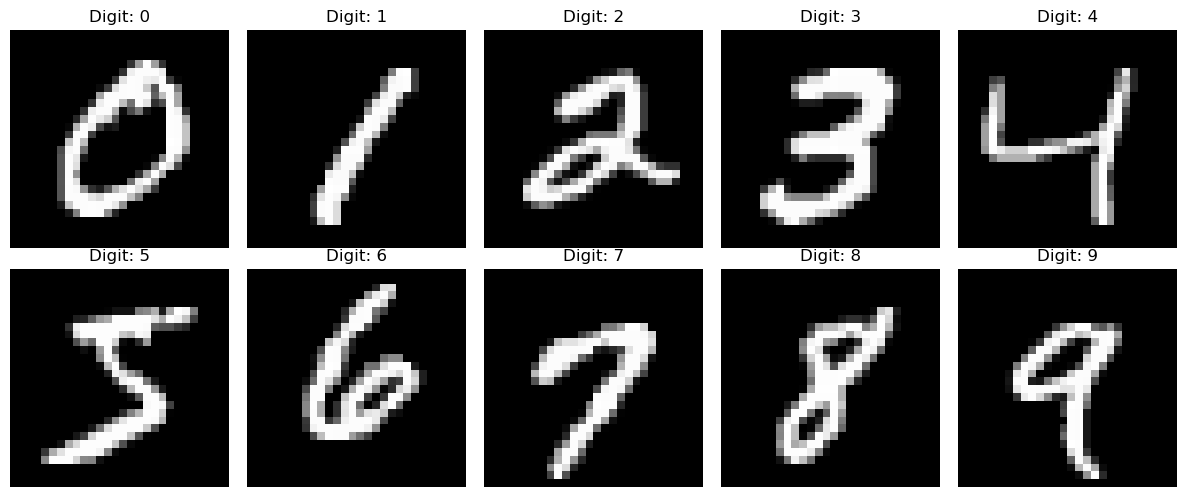

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Class Distribution: using the full training labels
unique, counts = np.unique(y_train_full, return_counts=True)
print("Class Distribution (number of samples per digit) in y_train_full:")
for digit, count in zip(unique, counts):
    print(f"Digit {digit}: {count}")

# 2. Basic Statistics: mean and standard deviation of pixel values from the full training set
mean_value = X_train_full.mean()
std_value = X_train_full.std()
print("\nPixel Value Statistics (X_train_full):")
print("Mean:", mean_value)
print("Standard Deviation:", std_value)

# 3. Visualization: display one sample image per digit
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.ravel()

for digit in range(10):
    # Find the first index where the label is equal to the digit
    idx = np.where(y_train_full == digit)[0][0]
    axes[digit].imshow(X_train_full[idx], cmap='gray')
    axes[digit].set_title(f"Digit: {digit}")
    axes[digit].axis('off')

plt.tight_layout()
plt.show()

### 2.3 Data Preprocessing


In [5]:
# Normalize the image data so that pixel values are scaled to the range [0, 1].
# This is done by converting the data type to float32 and dividing by 255.
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 3 k-NN Classifier

### 3.1 Model Initialization and Hyperparameter Tuning

k=1, validation accuracy=0.9741
k=3, validation accuracy=0.9727
k=5, validation accuracy=0.9715
k=7, validation accuracy=0.9696
k=9, validation accuracy=0.9673


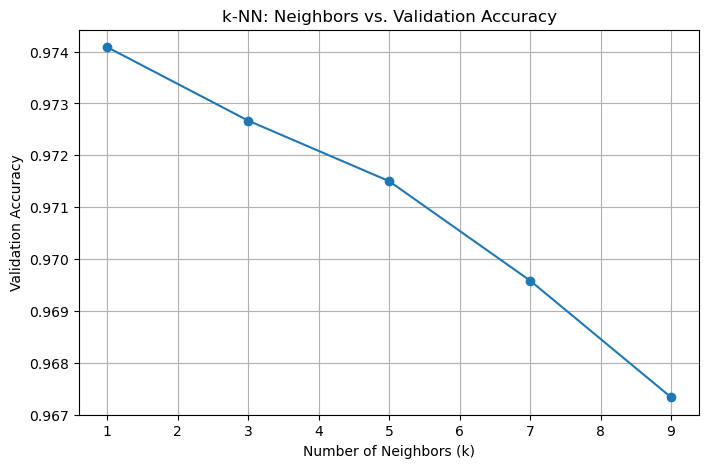

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Initialize a k-NN classifier
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

# 2. Experiment with different numbers of neighbors: 1, 3, 5, 7, and 9.
neighbors = [1, 3, 5, 7, 9]
accuracy_scores = []

# 3. Use the validation set to determine the optimal value based on accuracy.
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_flat, y_train)
    y_val_pred = knn.predict(X_val_flat)
    acc = accuracy_score(y_val, y_val_pred)
    accuracy_scores.append(acc)
    print(f"k={k}, validation accuracy={acc:.4f}")

# 4. Plot the the number of neighbors and validation accuracy. Be sure to label your axes.
plt.figure(figsize=(8, 5))
plt.plot(neighbors, accuracy_scores, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Validation Accuracy")
plt.title("k-NN: Neighbors vs. Validation Accuracy")
plt.grid(True)
plt.show()

### 3.2 Final Model Training and Evaluation

In [7]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 1. Retrain the k-NN classifier using the training and validation sets combined.
# Determine the best k based on the previously computed validation accuracy.
best_k = neighbors[np.argmax(accuracy_scores)]
print(f"Best k based on validation accuracy: {best_k}")

# Combine training and validation sets.
X_comb = np.concatenate((X_train, X_val), axis=0)
y_comb = np.concatenate((y_train, y_val), axis=0)
X_comb_flat = X_comb.reshape(X_comb.shape[0], -1)

# Retrain the k-NN classifier.
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_comb_flat, y_comb)

Best k based on validation accuracy: 1


KNeighborsClassifier(n_neighbors=1)

In [8]:

# 2. Evaluate the final model on the test set.
X_test_flat = X_test.reshape(X_test.shape[0], -1)
y_test_pred = knn_final.predict(X_test_flat)

acc_test = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Test set evaluation:")
print(f"Accuracy: {acc_test:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Test set evaluation:
Accuracy: 0.9691
Precision: 0.9692
Recall: 0.9691
F1-score: 0.9691

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.95      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.98      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



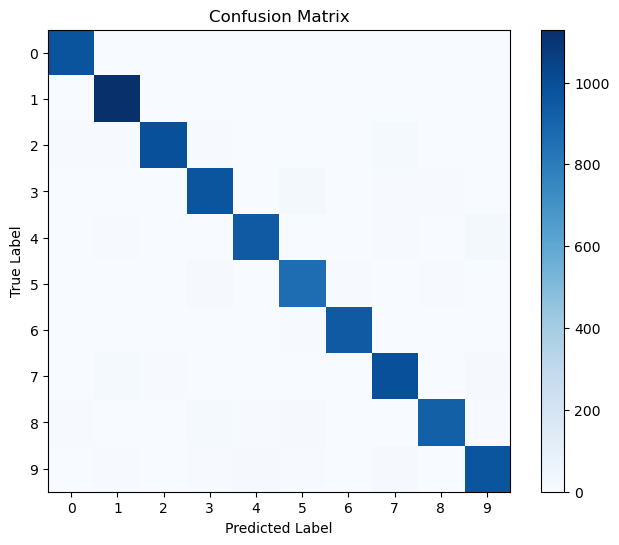

Digit 0: misclassified count = 7
Digit 1: misclassified count = 6
Digit 2: misclassified count = 40
Digit 3: misclassified count = 40
Digit 4: misclassified count = 38
Digit 5: misclassified count = 32
Digit 6: misclassified count = 14
Digit 7: misclassified count = 36
Digit 8: misclassified count = 54
Digit 9: misclassified count = 42

Digit 8 is the most frequently misclassified.


In [9]:

# 3. Generate and visualize a confusion matrix.
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 4. Discuss which digits are most frequently misclassified.
# Zero out the diagonal to focus only on misclassifications.
cm_mis = cm.copy()
for i in range(10):
    cm_mis[i, i] = 0

misclassifications_per_digit = cm_mis.sum(axis=1)
for digit, mis in enumerate(misclassifications_per_digit):
    print(f"Digit {digit}: misclassified count = {mis}")
most_misclassified_digit = np.argmax(misclassifications_per_digit)
print(f"\nDigit {most_misclassified_digit} is the most frequently misclassified.")

Total misclassified examples: 309


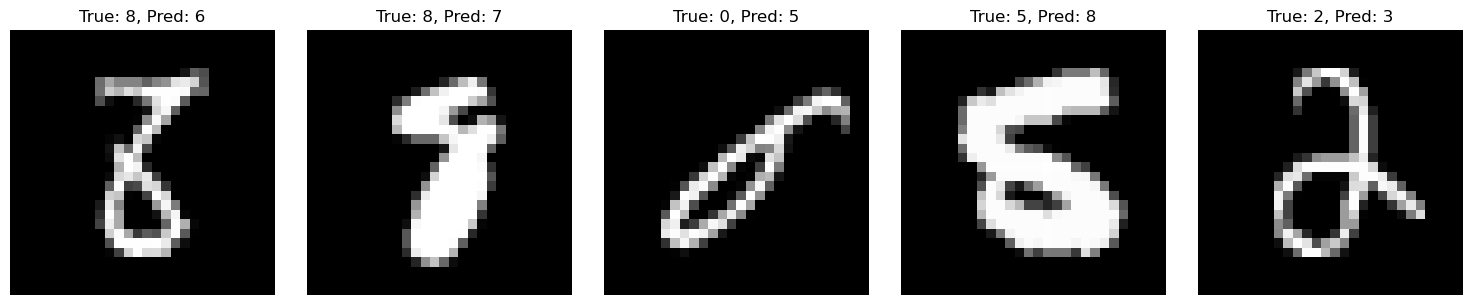

In [10]:
# 5. Display 5 random misclassified examples in a subplot.
mis_idx = np.where(y_test != y_test_pred)[0]
print(f"Total misclassified examples: {len(mis_idx)}")
if len(mis_idx) > 0:
    random_indices = np.random.choice(mis_idx, size=min(5, len(mis_idx)), replace=False)
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(random_indices):
        plt.subplot(1, 5, i+1)
        plt.imshow(X_test[idx], cmap='gray')
        plt.title(f"True: {y_test[idx]}, Pred: {y_test_pred[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# 4 Decision Tree Classifier

### 4.1 Model Training and Hyperparameter Tuning

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

results = {}

# Loop over the grid of hyperparameters.
for max_depth in [2, 5, 10]:
    for min_samples_split in [2, 5]:
        dt = DecisionTreeClassifier(max_depth=max_depth, 
                                    min_samples_split=min_samples_split,
                                    random_state=42)
        dt.fit(X_train_flat, y_train)
        y_val_pred = dt.predict(X_val_flat)
        acc_val = accuracy_score(y_val, y_val_pred)
        results[(max_depth, min_samples_split)] = acc_val
        print(f"max_depth={max_depth}, min_samples_split={min_samples_split} -> Validation Accuracy: {acc_val:.4f}")

# Select the best configuration.
best_config = max(results, key=results.get)
best_acc = results[best_config]
print(f'\nBest configuration: max_depth={best_config[0]}, min_samples_split={best_config[1]} with Validation Accuracy: {best_acc:.4f}')


max_depth=2, min_samples_split=2 -> Validation Accuracy: 0.3377
max_depth=2, min_samples_split=5 -> Validation Accuracy: 0.3377
max_depth=5, min_samples_split=2 -> Validation Accuracy: 0.6579
max_depth=5, min_samples_split=5 -> Validation Accuracy: 0.6579
max_depth=10, min_samples_split=2 -> Validation Accuracy: 0.8581
max_depth=10, min_samples_split=5 -> Validation Accuracy: 0.8565

Best configuration: max_depth=10, min_samples_split=2 with Validation Accuracy: 0.8581


##### Results and Model Selection

Decision Tree Classifier
- We tuned hyperparameters using combinations of `max_depth` and `min_samples_split` with the following results:
    - **(2, 2):** 0.3377
    - **(2, 5):** 0.3377
    - **(5, 2):** 0.6579
    - **(5, 5):** 0.6579
    - **(10, 2):** 0.8581
    - **(10, 5):** 0.8565
- **Model Selection:**  
    The configuration **(max_depth=10, min_samples_split=2)** achieved the highest validation accuracy of **0.8581**, so it was chosen as the best-performing Decision Tree model.

- **For Decision Trees**, the best hyperparameter setting was **(max_depth=10, min_samples_split=2)**.

The best-performing model within each approach was selected based on maximizing the validation accuracy. This process ensures that our final model configurations are tuned to generalize well on unseen test data.

### 4.2 Evaluation

In [12]:
# Combine training and validation sets.
y_comb = np.concatenate((y_train, y_val), axis=0)
X_comb_flat = X_comb.reshape(X_comb.shape[0], -1)

# Retrain the Decision Tree classifier with the best configuration (max_depth=10, min_samples_split=2)
dt_final = DecisionTreeClassifier(max_depth=10, min_samples_split=2, random_state=42)
dt_final.fit(X_comb_flat, y_comb)

# Evaluate the final Decision Tree model on the test set.
X_test_flat = X_test.reshape(X_test.shape[0], -1)
y_test_pred = dt_final.predict(X_test_flat)

acc_test = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Test set evaluation (Decision Tree):")
print(f"Accuracy: {acc_test:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Test set evaluation (Decision Tree):
Accuracy: 0.8663
Precision: 0.8668
Recall: 0.8663
F1-score: 0.8663

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.85      0.84      0.84      1032
           3       0.82      0.84      0.83      1010
           4       0.86      0.85      0.86       982
           5       0.84      0.80      0.82       892
           6       0.91      0.87      0.89       958
           7       0.90      0.88      0.89      1028
           8       0.80      0.81      0.80       974
           9       0.81      0.86      0.83      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.87      0.87     10000



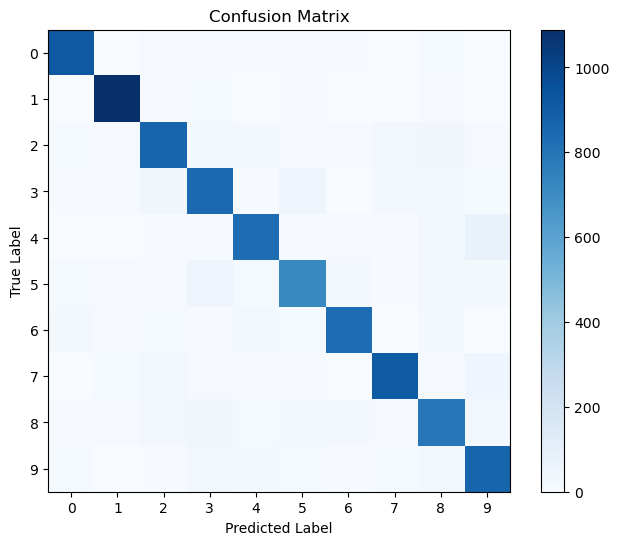

In [13]:
# 2. Generate a confusion matrix and provide an analysis of the results. In your discussion, highlight any
# patterns in misclassifications, such as which digits are most frequently confused with one another.


# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

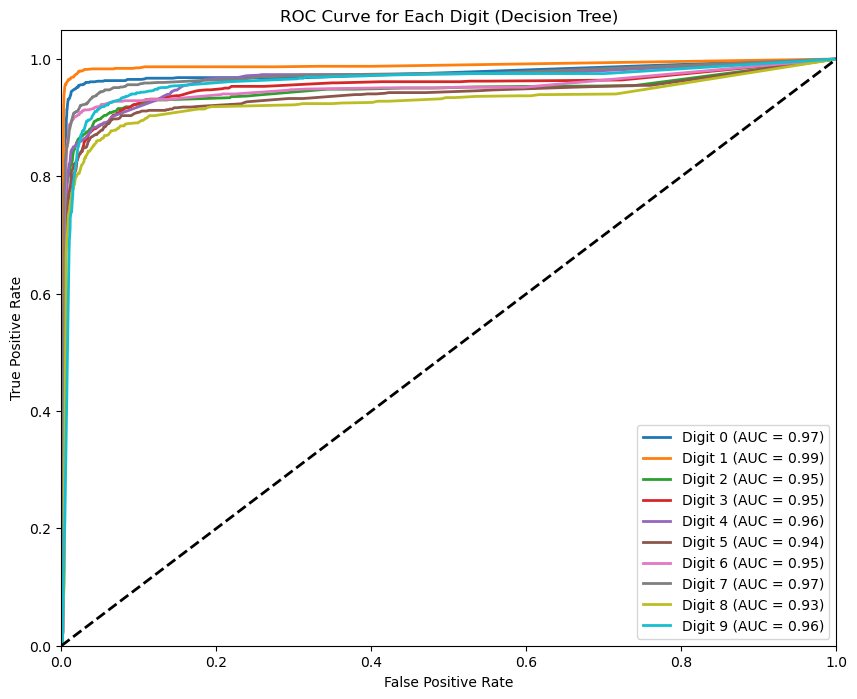

In [14]:
# 3. Plot the ROC curve for each digit on a single plot using the Decision Tree classifier.
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize test labels for multi-class ROC computation
y_test_binarized = label_binarize(y_test, classes=np.arange(10))
n_classes = y_test_binarized.shape[1]

# Get prediction probabilities using dt_final
y_score = dt_final.predict_proba(X_test_flat)

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Digit {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Each Digit (Decision Tree)")
plt.legend(loc="lower right")
plt.show()
